# Parte 1

In [54]:
import cv2

In [55]:
#Para mostrar las imagenes en ventanas emergentes saca el inline
%matplotlib inline

#Agregamos numpy para usar OpenCV
import numpy as np
#Agregamos cv2 para acceder a OpenCV
import cv2 as cv
#Agregamos para ver los graficos
import matplotlib.pyplot as plt

In [56]:
Crom1 = cv.imread('coord_cromaticas/CoordCrom_1.png')
Crom2 = cv.imread('coord_cromaticas/CoordCrom_2.png')
Crom3 = cv.imread('coord_cromaticas/CoordCrom_3.png')

(996, 908, 1)


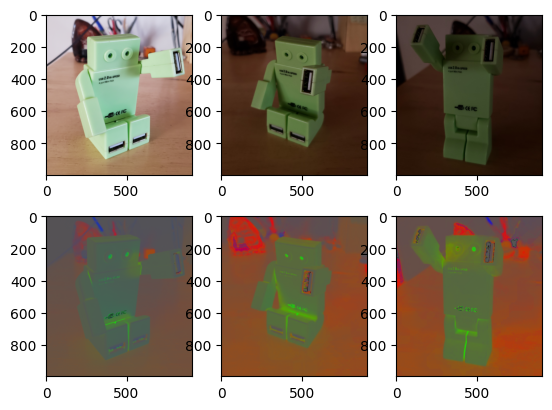

In [57]:
# Conversion de BGR a RGB
Crom1 = cv.cvtColor(Crom1, cv.COLOR_BGR2RGB)
Crom2 = cv.cvtColor(Crom2, cv.COLOR_BGR2RGB)
Crom3 = cv.cvtColor(Crom3, cv.COLOR_BGR2RGB)

fig = plt.figure()
ax1=plt.subplot(231)
ax1.imshow(Crom1)
ax2=plt.subplot(232)
ax2.imshow(Crom2)
ax3=plt.subplot(233)
ax3.imshow(Crom3)

# Vectores por cada pixel con suma de los valores de cada canal
rgb1 = Crom1.sum(axis=2)[:,:,np.newaxis]
rgb2 = Crom2.sum(axis=2)[:,:,np.newaxis]
rgb3 = Crom3.sum(axis=2)[:,:,np.newaxis]

print(rgb1.shape)

# En caso de ser cero cambiamos el valor para evitar division por 0
rgb1[rgb1 == 0] = 1
rgb2[rgb2 == 0] = 1
rgb3[rgb3 == 0] = 1

# Aplicamos algoritmo de coordenadas cromaticas y lo escalamos
img1 = (Crom1/rgb1)*255
img2 = (Crom2/rgb2)*255
img3 = (Crom3/rgb3)*255

np.clip(img1, 0, 255, out=img1) #Escala de 0 a 255
np.clip(img2, 0, 255, out=img2) #Escala de 0 a 255
np.clip(img3, 0, 255, out=img3) #Escala de 0 a 255
img1 = img1.astype('uint8') # Castea a uint8
img2 = img2.astype('uint8') # Castea a uint8
img3 = img3.astype('uint8') # Castea a uint8

ax4 = plt.subplot(234)
ax4.imshow(img1)
ax5 = plt.subplot(235)
ax5.imshow(img2)
ax6 = plt.subplot(236)
ax6.imshow(img3)

# Algoritmo White Patch

In [102]:
def white_patch(img,fc,file_name):
    wp = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    max=[]
    sat=False
    R1,G1,B1=cv.split(wp)
    for i in range(3):
        maximo=np.max(wp[:,:,i])
        if maximo==255:
            print("Canal",i,"de la imagen",file_name,"saturado")
            #maximo=maximo*fc
            sat=True
        max.append(maximo)
    if sat:
        max=max*fc
    R1,G1,B1=(255/max[0])*R1,(255/max[1])*G1,(255/max[2])*B1
    
    wp_t=np.dstack((R1,G1,B1)).astype('uint8')
    fig = plt.figure()
    ax1=plt.subplot(121)
    ax1.set_title(file_name)
    ax1.imshow(wp)
    ax2=plt.subplot(122)
    ax2.imshow(wp_t)

Colocamos un factor de corrección para canales saturados, ya que si el maximo es 255 no estariamos haciendo ninguna corrección sobre la imagen.

Canal 0 de la imagen wp_blue.jpg saturado
Canal 1 de la imagen wp_blue.jpg saturado
Canal 2 de la imagen wp_blue.jpg saturado
Canal 1 de la imagen wp_green2.jpg saturado
Canal 0 de la imagen wp_red.png saturado
Canal 0 de la imagen wp_red2.jpg saturado


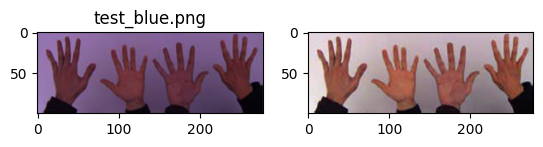

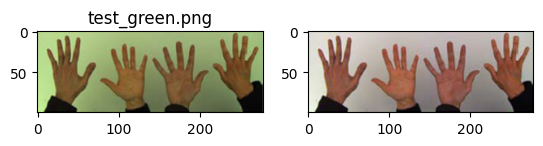

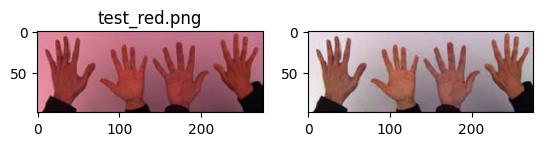

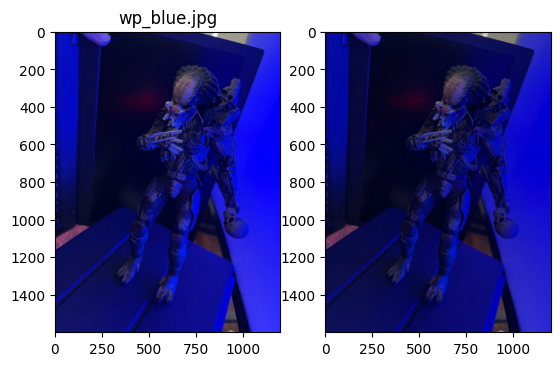

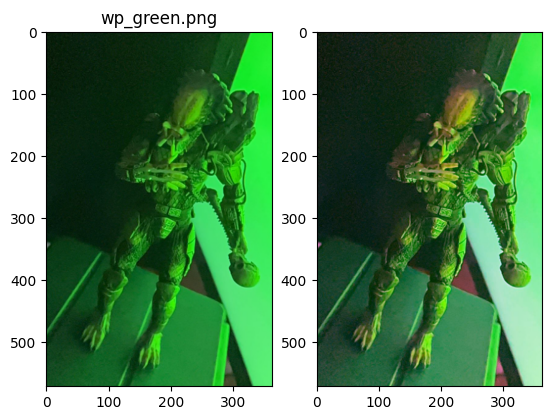

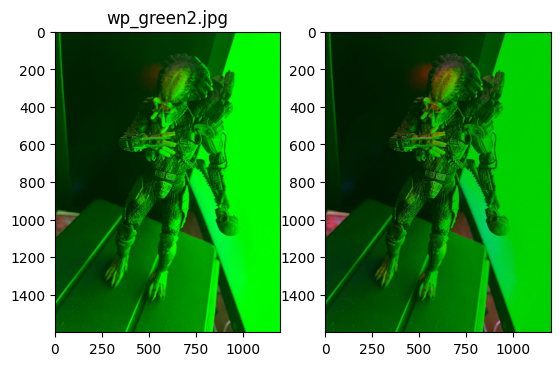

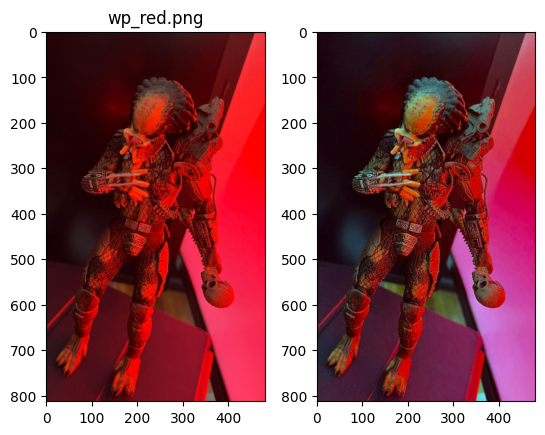

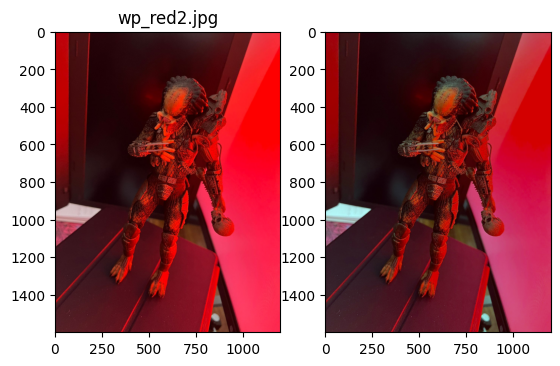

In [103]:
from os import walk,path

# folder path
dir_path = 'white_patch'

# list to store files name
res = []
for (dir_path, dir_names, file_names) in walk(dir_path):
    res.extend(file_names)
for img in res:
    wp=cv.imread(path.join(dir_path,img))
    white_patch(wp,1.2,img)

# Parte 2

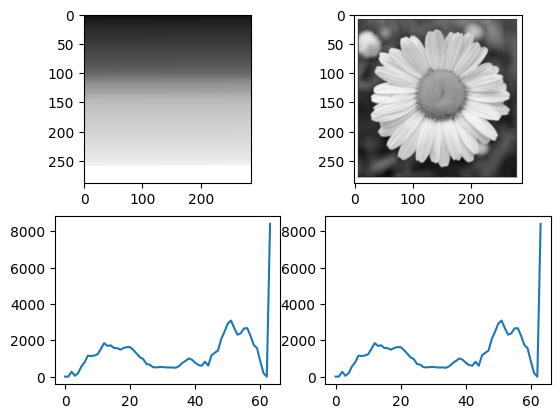

In [60]:
img1=cv.imread('img1_tp.png',0)
img2=cv.imread('img2_tp.png',0)

fig = plt.figure()
ax1=plt.subplot(221)
ax1.imshow(img1, cmap='gray')
ax2=plt.subplot(222)
ax2.imshow(img2, cmap='gray')

hist1,bins1 = np.histogram(img1.ravel(),64,[0,256])
ax3=plt.subplot(223)
ax3.plot(hist1)
hist2,bins2 = np.histogram(img2.ravel(),64,[0,256])
ax4=plt.subplot(224)
ax4.plot(hist2)

No usaria un histograma como feature para deteccion en base a lo que veo por que los histogramas son iguales siendo que la imagen de la derecha es una flor y la de la izquierda es un degrade sin forma.

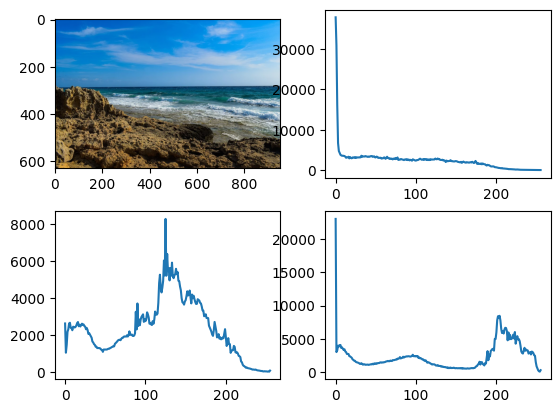

In [61]:
seg=cv.imread('segmentacion.png')
seg=cv.cvtColor(seg,cv.COLOR_BGR2RGB)

fig = plt.figure()
ax1=plt.subplot(221)
ax1.imshow(seg)

R,G,B=cv.split(seg)

histR,binsR = np.histogram(R.ravel(),256,[0,256])
ax2=plt.subplot(222)
ax2.plot(histR)

histG,binsG = np.histogram(G.ravel(),256,[0,256])
ax3=plt.subplot(223)
ax3.plot(histG)

histB,binsB = np.histogram(B.ravel(),256,[0,256])
ax4=plt.subplot(224)
ax4.plot(histB)

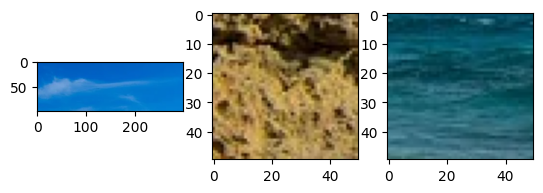

In [62]:
img_muestra_cielo = seg[0:100,100:400,:]
img_muestra_tierra = seg[450:500,0:50,:]
img_muestra_mar = seg[300:350,600:650,:]

fig2 = plt.figure()
ax1=plt.subplot(131)
ax1.imshow(img_muestra_cielo)
ax2=plt.subplot(132)
ax2.imshow(img_muestra_tierra)
ax3=plt.subplot(133)
ax3.imshow(img_muestra_mar)

In [63]:
color_mean_c, color_std_c = cv.meanStdDev(img_muestra_cielo)
color_mean_t, color_std_t = cv.meanStdDev(img_muestra_tierra)
color_mean_m, color_std_m = cv.meanStdDev(img_muestra_mar)

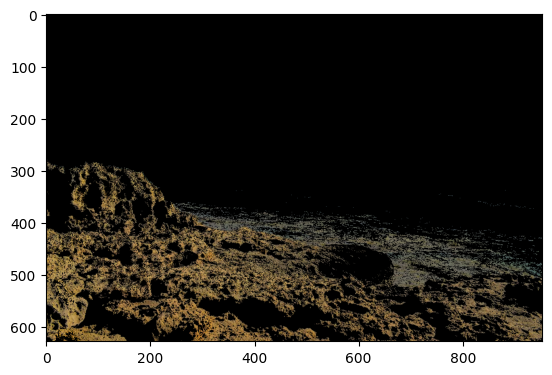

<function matplotlib.pyplot.show(close=None, block=None)>

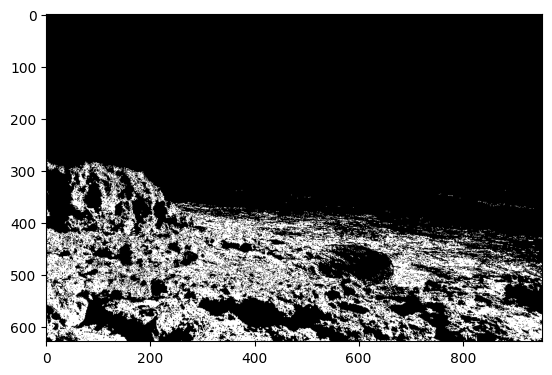

In [64]:
# Pintemos de blanco los puntos que estén cerca de la media en un radio menor que 1.25 sigmas
n_sigma = 1.25
mask = cv.inRange(seg, color_mean_t-color_std_t * n_sigma,  color_mean_t+color_std_t * n_sigma)
img_segmentada = cv.bitwise_and(seg, seg, mask=mask)

plt.figure(3)
plt.imshow(img_segmentada)
plt.show()

plt.figure(4)
plt.imshow(mask,cmap='gray')
plt.show

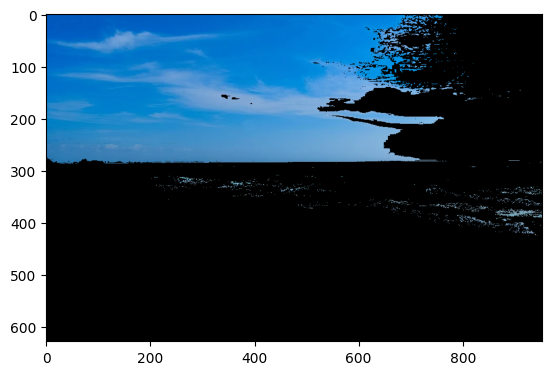

<function matplotlib.pyplot.show(close=None, block=None)>

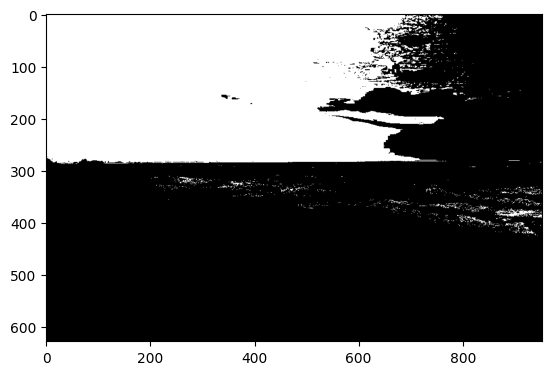

In [65]:
# Pintemos de blanco los puntos que estén cerca de la media en un radio menor que 3 sigmas
n_sigma = 5
mask = cv.inRange(seg, color_mean_c-color_std_c * n_sigma,  color_mean_c+color_std_c * n_sigma)
img_segmentada = cv.bitwise_and(seg, seg, mask=mask)

plt.figure(3)
plt.imshow(img_segmentada)
plt.show()

plt.figure(4)
plt.imshow(mask,cmap='gray')
plt.show

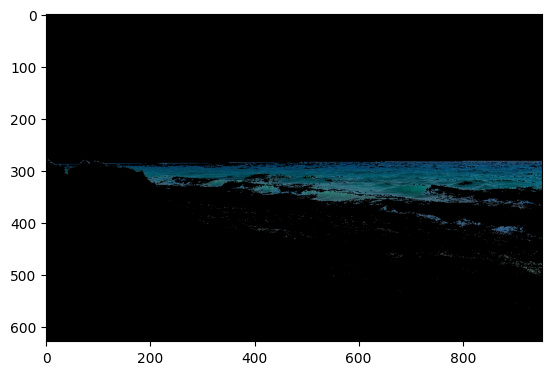

<function matplotlib.pyplot.show(close=None, block=None)>

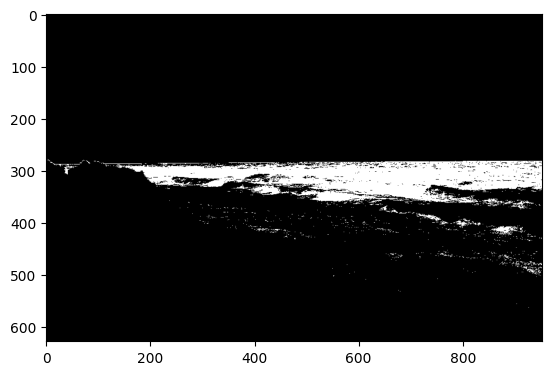

In [66]:
# Pintemos de blanco los puntos que estén cerca de la media en un radio menor que 3 sigmas
n_sigma = 2
mask = cv.inRange(seg, color_mean_m-color_std_m * n_sigma,  color_mean_m+color_std_m * n_sigma)
img_segmentada = cv.bitwise_and(seg, seg, mask=mask)

plt.figure(3)
plt.imshow(img_segmentada)
plt.show()

plt.figure(4)
plt.imshow(mask,cmap='gray')
plt.show

## Ahora segmento en espacio HSV para ver si puedo mejorar la segmentacion en RGB

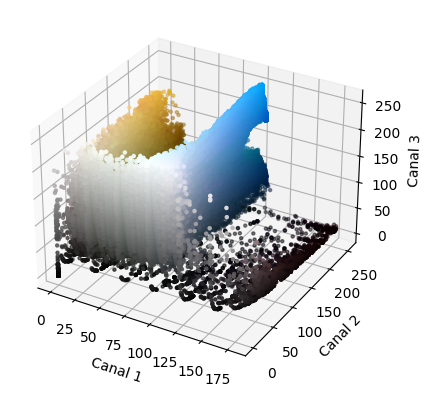

In [67]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

img_HSV = cv.cvtColor(seg, cv.COLOR_RGB2HSV)

c1, c2, c3 = cv.split(seg)
c1, c2, c3 = cv.split(img_HSV)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

pixel_colors = seg.reshape((np.shape(seg)[0]*np.shape(seg)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

axis.scatter(c1.flatten(), c2.flatten(), c3.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Canal 1")
axis.set_ylabel("Canal 2")
axis.set_zlabel("Canal 3")
plt.show()

(102.76960000000001, 166.03, 192.1416, 0.0)


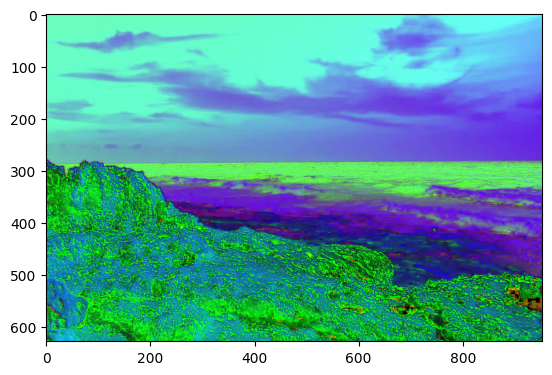

In [68]:
# Pasamos la imagen a HSV y calculo el color de muestra

img_HSV = cv.cvtColor(seg, cv.COLOR_RGB2HSV)
plt.figure(5)
plt.imshow(img_HSV)

#img_muestra = img_HSV[100:150,325:375,:]
img_muestra_hsv = img_HSV[230:280,230:280,:]

# Calculamos un modelo estadístico sencillo para caracterizar el color del morrón rojo en el espacio RGB
color_mean = cv.mean(img_muestra_hsv)
    
print(color_mean)

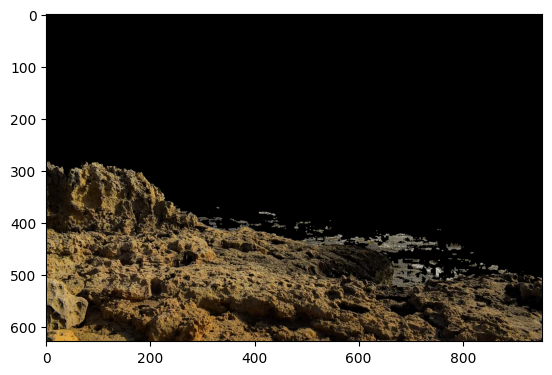

<function matplotlib.pyplot.show(close=None, block=None)>

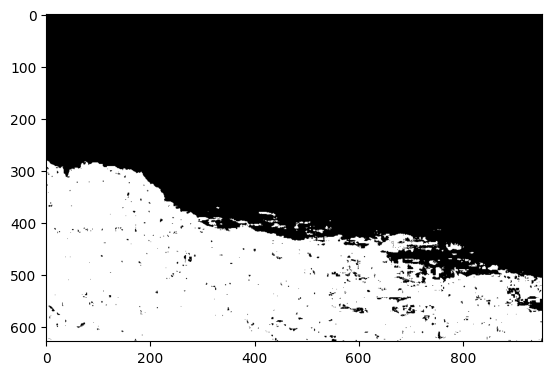

In [69]:
color_l = (0,0,0)
color_u = (25,255,255)

mask = cv.inRange(img_HSV, color_l,  color_u)
img_segmentada = cv.bitwise_and(seg, seg, mask=mask)

plt.figure(6)
plt.imshow(img_segmentada)
plt.show()
plt.figure(7)
plt.imshow(mask,cmap='gray')
plt.show

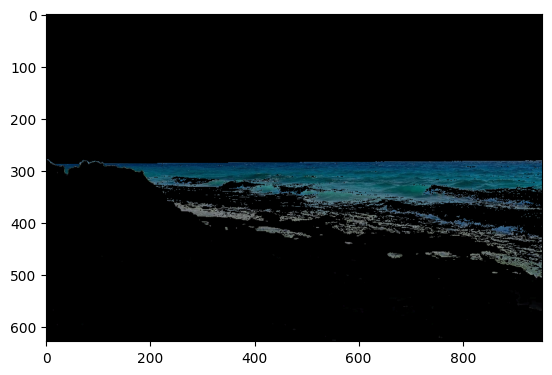

<function matplotlib.pyplot.show(close=None, block=None)>

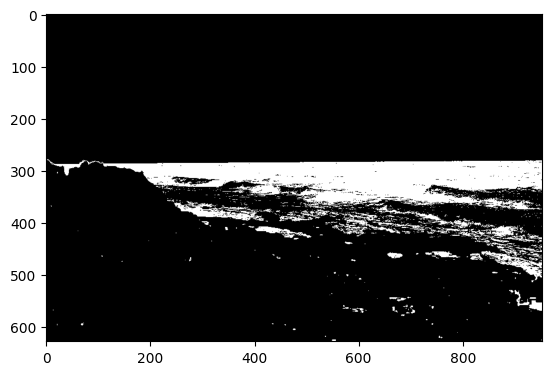

In [70]:
color_l = (50,0,0)
color_u = (150,255,150)

mask = cv.inRange(img_HSV, color_l,  color_u)
img_segmentada = cv.bitwise_and(seg, seg, mask=mask)

plt.figure(6)
plt.imshow(img_segmentada)
plt.show()
plt.figure(7)
plt.imshow(mask,cmap='gray')
plt.show

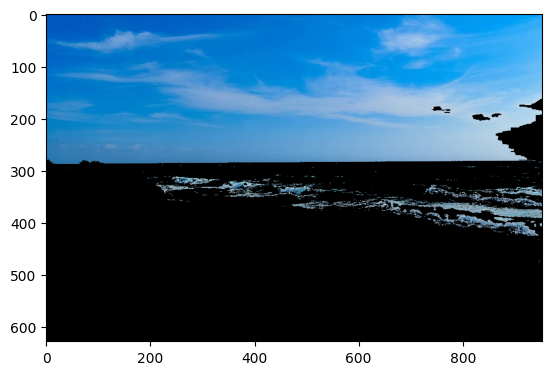

<function matplotlib.pyplot.show(close=None, block=None)>

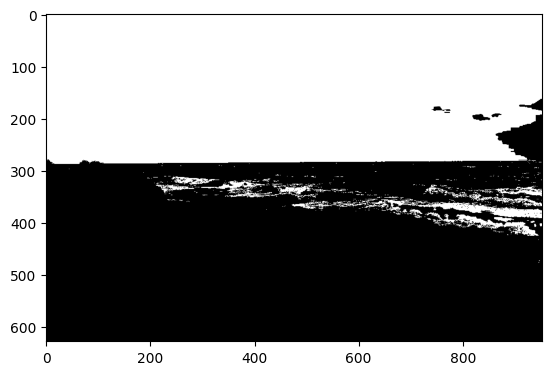

In [71]:
color_l = (75,50,150)
color_u = (125,255,255)

mask = cv.inRange(img_HSV, color_l,  color_u)
img_segmentada = cv.bitwise_and(seg, seg, mask=mask)

plt.figure(6)
plt.imshow(img_segmentada)
plt.show()
plt.figure(7)
plt.imshow(mask,cmap='gray')
plt.show